# Initial WSJ Data Exploration

It seems the WSJ data only goes back to Feb 5, 1971 (and is missing some dates). We'll want to find some other data that covers from 1918 - 1971 if possible or at least 1945 - 1971 (post-WWII).

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from seaborn import set_style
set_style("whitegrid")

In [110]:
price2 = pd.read_csv('WSJ_HistoricalPrices(Jan 1, 1981 - Oct 10, 2024).csv')
price1 = pd.read_csv('WSJ_HistoricalPrices(Feb 5, 1971 - Dec 31, 1980).csv')
dates = pd.read_csv('DaylightSavingsTimeChangeDates_1971-2024.csv')

In [52]:
price = pd.concat([price2, price1], axis=0)
price

,Date,Open,High,Low,Close
0,10/10/24,18200.62,18333.39,18154.18,18282.05
1,10/09/24,18179.22,18302.05,18133.02,18291.62
2,10/08/24,18017.93,18203.04,17989.70,18182.92
3,10/07/24,18080.12,18096.33,17900.03,17923.90
4,10/04/24,18130.42,18145.28,17952.30,18137.85
...,...,...,...,...,...
2495,02/11/71,101.45,101.45,101.45,101.45
2496,02/10/71,100.69,100.69,100.69,100.69
2497,02/09/71,100.76,100.76,100.76,100.76
2498,02/08/71,100.84,100.84,100.84,100.84


In [61]:
# dataframe in chronological order
price_chrono = price.iloc[::-1].reset_index(drop=True)
price = price_chrono

In [54]:
dates

,Year,Day of Week,Date,Time before change,Time after change,Day of Week.1,Date.1,Time before change.1,Time after change.1
0,1971,Sunday,25 April,2:00,3:00,Sunday,31 October,2:00,1:00
1,1972,Sunday,30 April,2:00,3:00,Sunday,29 October,2:00,1:00
2,1973,Sunday,29 April,2:00,3:00,Sunday,28 October,2:00,1:00
3,1974,Sunday,6 January,2:00,3:00,Sunday,27 October,2:00,1:00
4,1975,Sunday,23 February,2:00,3:00,Sunday,26 October,2:00,1:00
5,1976,Sunday,25 April,2:00,3:00,Sunday,31 October,2:00,1:00
6,1977,Sunday,24 April,2:00,3:00,Sunday,30 October,2:00,1:00
7,1978,Sunday,30 April,2:00,3:00,Sunday,29 October,2:00,1:00
8,1979,Sunday,29 April,2:00,3:00,Sunday,28 October,2:00,1:00
9,1980,Sunday,27 April,2:00,3:00,Sunday,26 October,2:00,1:00


In [62]:
dst_dates_spring = pd.to_datetime(dates.Date+" "+dates.Year.astype(str))
dst_dates_fall = pd.to_datetime(dates['Date.1']+" "+dates.Year.astype(str))

In [63]:
price['Date'] = pd.to_datetime(price.Date, format="%m/%d/%y")

In [141]:
dst_mon_spring = dst_dates_spring+pd.DateOffset(1)
dst_fri_spring = dst_dates_spring+pd.DateOffset(-2)
dst_mon_fall = dst_dates_fall+pd.DateOffset(1)
dst_fri_fall = dst_dates_fall+pd.DateOffset(-2)
dst_mon = pd.concat([dst_mon_spring,dst_mon_fall])
dst_fri = pd.concat([dst_fri_spring,dst_fri_fall])

In [64]:
price_dst_mon_spring = price[price.Date.isin(dst_mon_spring)]
price_dst_fri_spring = price[price.Date.isin(dst_fri_spring)]
price_dst_mon_fall = price[price.Date.isin(dst_mon_fall)]
price_dst_fri_fall = price[price.Date.isin(dst_fri_fall)]
price_dst_mon = pd.concat([price_dst_mon_spring,price_dst_mon_fall])
price_dst_fri = pd.concat([price_dst_fri_spring,price_dst_fri_fall])
price_dst_mon

,Date,Open,High,Low,Close
54,1971-04-26,111.13,111.13,111.13,111.13
312,1972-05-01,130.16,130.16,130.16,130.16
561,1973-04-30,107.85,107.85,107.85,107.85
735,1974-01-07,94.47,94.47,94.47,94.47
1021,1975-02-24,73.14,73.14,73.14,73.14
...,...,...,...,...,...
12294,2019-11-04,8445.50,8451.37,8421.30,8433.20
12545,2020-11-02,11010.45,11071.08,10830.94,10957.61
12801,2021-11-08,15995.72,16038.23,15961.81,15982.36
13052,2022-11-07,10516.94,10587.96,10428.91,10564.52


In [158]:
def plot_single_difference(data1, data2, t, n_bins=5):
    diff = data2 - data1
    
    fig,ax = plt.subplots()
    ax.hist(diff, bins=n_bins, density=True)
    ax.set_title(t)
    ax.set_ylabel('Arbitrary Units')

def plot_difference_comparison(data1a, data1b, data2a, data2b, t1, t2, n_bins=5):
    diff1 = data1b - data1a
    diff2 = data2b - data2a
    diff_min = np.min(np.concatenate([diff1, diff2]))
    diff_max = np.max(np.concatenate([diff1, diff2]))
    
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(diff1, bins=n_bins, range=[diff_min,diff_max], alpha=0.8, density=True)
    axs[1].hist(diff2, bins=n_bins, range=[diff_min,diff_max], alpha=0.8, density=True)
    axs[0].set_title(t1)
    axs[0].set_ylabel('Arbitrary Units')
    axs[1].set_title(t2)

def plot_overlaid_difference(data1a, data1b, data2a, data2b, label1, label2, t, n_bins=5):
    diff1 = data1b - data1a
    diff2 = data2b - data2a

    fig,ax = plt.subplots()
    ax.hist([diff1,diff2], bins=n_bins, histtype='stepfilled', density=True, label=[label1,label2], alpha=0.7)
    ax.set_title(t)
    ax.set_ylabel('Arbitrary Units')
    ax.set_xlabel('$')
    ax.legend()

def plot_overlaid_fractional_difference(data1a, data1b, data2a, data2b, label1, label2, t, n_bins=5):
    diff1 = (data1b - data1a) / data1a * 100
    diff2 = (data2b - data2a) / data2a * 100

    fig,ax = plt.subplots()
    ax.hist([diff1,diff2], bins=n_bins, range=[-10000,10000], histtype='stepfilled', density=True, label=[label1,label2], alpha=0.7)
    ax.set_title(t)
    ax.set_ylabel('Arbitrary Units')
    ax.set_xlabel('%')
    #ax.set_xlim([-1000,1000])
    ax.legend()
    

# WSJ Spring Change

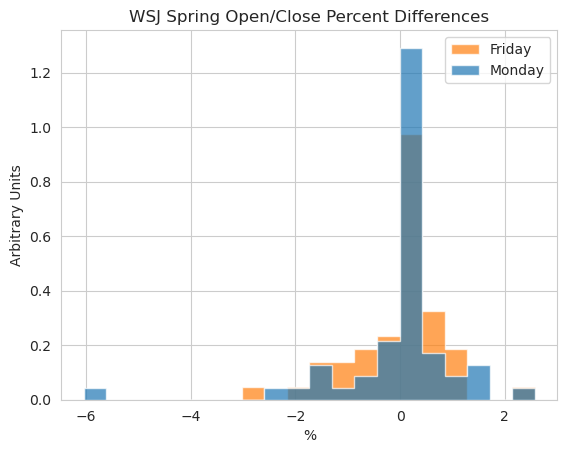

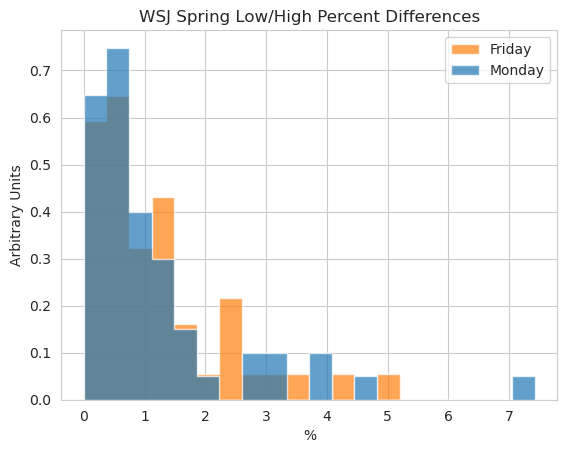

In [31]:
plot_overlaid_fractional_difference(price_dst_mon_spring[' Open'], price_dst_mon_spring[' Close'], price_dst_fri_spring[' Open'], price_dst_fri_spring[' Close'], 'Monday', 'Friday', 'WSJ Spring Open/Close Percent Differences',20)
plot_overlaid_fractional_difference(price_dst_mon_spring[' Low'], price_dst_mon_spring[' High'], price_dst_fri_spring[' Low'], price_dst_fri_spring[' High'], 'Monday', 'Friday', 'WSJ Spring Low/High Percent Differences',20)

# WSJ Fall Change

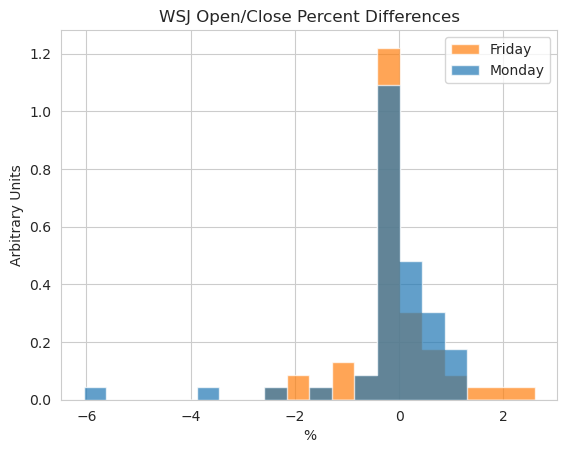

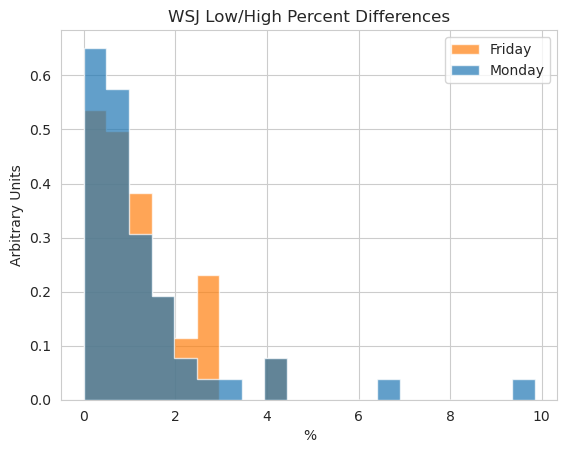

In [33]:
plot_overlaid_fractional_difference(price_dst_mon_fall[' Open'], price_dst_mon_fall[' Close'], price_dst_fri_fall[' Open'], price_dst_fri_fall[' Close'], 'Monday', 'Friday', 'WSJ Open/Close Percent Differences',20)
plot_overlaid_fractional_difference(price_dst_mon_fall[' Low'], price_dst_mon_fall[' High'], price_dst_fri_fall[' Low'], price_dst_fri_fall[' High'], 'Monday', 'Friday', 'WSJ Low/High Percent Differences',20)

# WSJ Spring and Fall Changes Combined

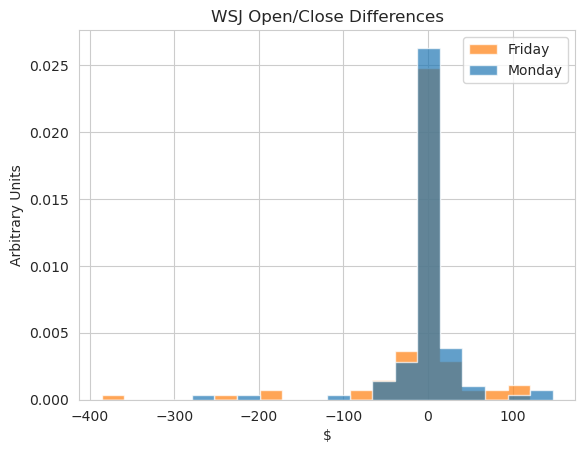

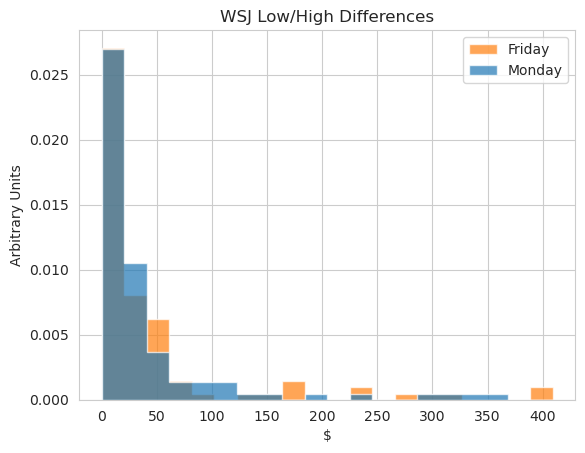

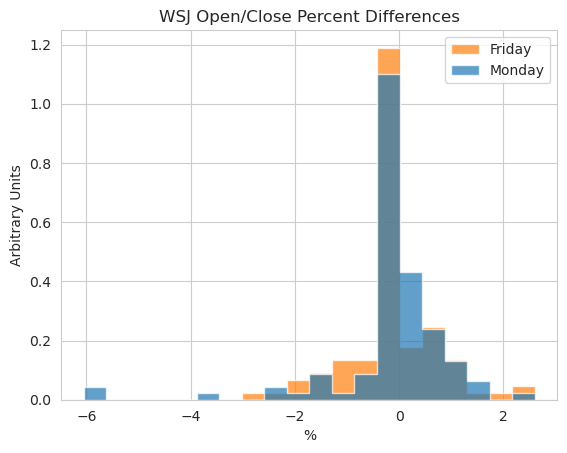

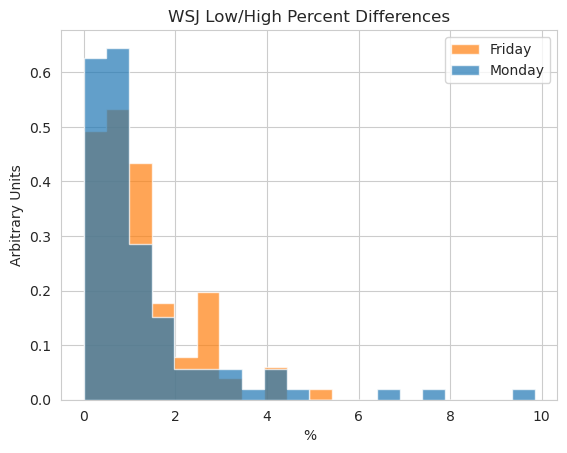

In [34]:
#plot_single_difference(price_dst_mon[' Open'], price_dst_mon[' Close'], 'WSJ Open to Close Difference - Monday',20)
#plot_single_difference(price_dst_fri[' Open'], price_dst_fri[' Close'], 'WSJ Open to Close Difference - Friday',20)
#plot_difference_comparison(price_dst_mon[' Open'], price_dst_mon[' Close'], price_dst_fri[' Open'], price_dst_fri[' Close'], 'WSJ Open/Close Difference - Monday','WSJ Open/Close Difference - Friday',20)
plot_overlaid_difference(price_dst_mon[' Open'], price_dst_mon[' Close'], price_dst_fri[' Open'], price_dst_fri[' Close'], 'Monday', 'Friday', 'WSJ Open/Close Differences',20)
plot_overlaid_difference(price_dst_mon[' Low'], price_dst_mon[' High'], price_dst_fri[' Low'], price_dst_fri[' High'], 'Monday', 'Friday', 'WSJ Low/High Differences',20)
plot_overlaid_fractional_difference(price_dst_mon[' Open'], price_dst_mon[' Close'], price_dst_fri[' Open'], price_dst_fri[' Close'], 'Monday', 'Friday', 'WSJ Open/Close Percent Differences',20)
plot_overlaid_fractional_difference(price_dst_mon[' Low'], price_dst_mon[' High'], price_dst_fri[' Low'], price_dst_fri[' High'], 'Monday', 'Friday', 'WSJ Low/High Percent Differences',20)


In [107]:
wsj_fri = price[price['Date'].dt.day_name()=='Friday']
wsj_fri = wsj_fri.drop(wsj_fri[wsj_fri['Date'].isin(dst_fri_spring) | wsj_fri['Date'].isin(dst_fri_fall)].index)
wsj_mon = price[price['Date'].dt.day_name()=='Monday']
wsj_mon = wsj_mon.drop(wsj_mon[wsj_mon['Date'].isin(dst_mon_spring) | wsj_mon['Date'].isin(dst_mon_fall)].index)
wsj_fri = wsj_fri.drop(wsj_fri[wsj_fri['Date'].isin(wsj_mon['Date']+pd.DateOffset(-3))==False].index)
wsj_mon = wsj_mon.drop(wsj_mon[wsj_mon['Date'].isin(wsj_fri['Date']+pd.DateOffset(3))==False].index)
price_dst_fri = price_dst_fri.drop(price_dst_fri[price_dst_fri['Date'].isin(price_dst_mon['Date']+pd.DateOffset(-3))==False].index)
price_dst_mon = price_dst_mon.drop(price_dst_mon[price_dst_mon['Date'].isin(price_dst_fri['Date']+pd.DateOffset(3))==False].index)

wsj_fri = wsj_fri.reset_index(drop=True)
wsj_mon = wsj_mon.reset_index(drop=True)
price_dst_fri = price_dst_fri.reset_index(drop=True)
price_dst_mon = price_dst_mon.reset_index(drop=True)

print(len(wsj_fri))
print(len(wsj_mon))
print(len(price_dst_mon))
print(len(price_dst_fri))
price_dst_mon[' Close'] - price_dst_fri[' Open']


2365
2365
103
103


0        0.44
1       -1.17
2       -0.55
3        0.37
4       -0.65
        ...  
98      98.15
99    -145.86
100    -21.20
101     16.37
102    155.93
Length: 103, dtype: float64

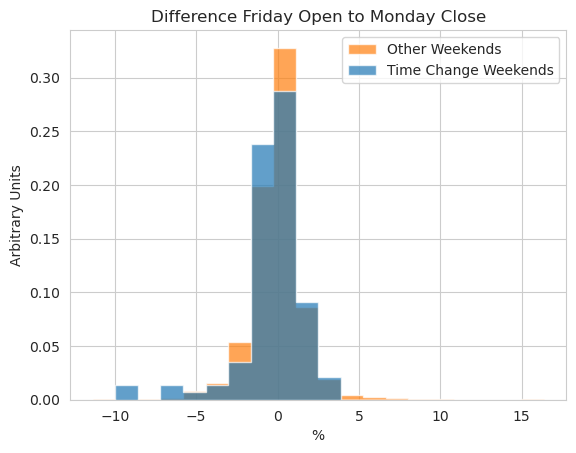

In [155]:
plot_overlaid_fractional_difference(price_dst_fri[' Open'], price_dst_mon[' Close'], wsj_fri[' Open'], wsj_mon[' Close'], 'Time Change Weekends', 'Other Weekends', 'Difference Friday Open to Monday Close', 20)

In [113]:
import kagglehub
apple_path = kagglehub.dataset_download("shiivvvaam/apple-stock-market-historical-data-1980-2024")
print("Path to dataset files:", apple_path)

Path to dataset files: /home/hava/.cache/kagglehub/datasets/shiivvvaam/apple-stock-market-historical-data-1980-2024/versions/6


In [114]:
apple_csv_path = apple_path + '/AAPL(80-24) Final.csv'
print(apple_csv_path)
apple_df = pd.read_csv(apple_csv_path)
apple_df.head(10)

/home/hava/.cache/kagglehub/datasets/shiivvvaam/apple-stock-market-historical-data-1980-2024/versions/6/AAPL(80-24) Final.csv


,Date,Price,Open,High,Low,Vol.,Change %
0,03/27/2024,173.31,170.30,173.58,170.14,59.11M,2.12%
1,03/26/2024,169.71,170.01,171.41,169.65,57.22M,-0.67%
2,03/25/2024,170.85,170.37,171.94,169.46,54.21M,-0.83%
3,03/22/2024,172.28,171.76,173.05,170.06,71.16M,0.53%
4,03/21/2024,171.37,177.05,177.49,170.84,106.18M,-4.09%
5,03/20/2024,178.67,175.72,178.67,175.09,52.41M,1.47%
6,03/19/2024,176.08,174.34,176.60,173.03,54.85M,1.36%
7,03/18/2024,173.72,175.57,177.71,173.52,75.08M,0.64%
8,03/15/2024,172.62,171.17,172.62,170.29,119.99M,-0.22%
9,03/14/2024,173.00,172.91,174.31,172.05,72.57M,1.09%


In [115]:
apple_df['Date']=pd.to_datetime(apple_df['Date'])

In [116]:
apple_dst_mon_spring = apple_df[apple_df['Date'].isin(dst_mon_spring)]
apple_dst_fri_spring = apple_df[apple_df['Date'].isin(dst_fri_spring)]

In [117]:
apple_dst_mon_spring.loc[:,'Vol.'] = apple_dst_mon_spring['Vol.'].apply(lambda x: x.replace('M','')).apply(lambda x: x.replace('B','e+03')).apply(float)
apple_dst_fri_spring.loc[:,'Vol.'] = apple_dst_fri_spring['Vol.'].apply(lambda x: x.replace('M','')).apply(lambda x: x.replace('B','e+03')).apply(float)

Text(0.5, 0, 'Trades (millions)')

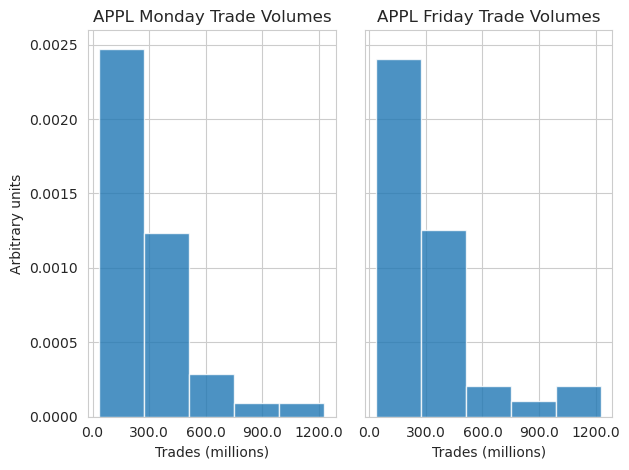

In [109]:
#plt.hist(apple_fri_spring['Vol.'], bins=5)
vol_min = np.min(np.concatenate([apple_mon_spring['Vol.'],apple_fri_spring['Vol.']]))
vol_max = np.max(np.concatenate([apple_mon_spring['Vol.'],apple_fri_spring['Vol.']]))

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(apple_mon_spring['Vol.'], bins=5, range=[vol_min,vol_max], alpha=0.8, density=True)
axs[1].hist(apple_fri_spring['Vol.'], bins=5, range=[vol_min,vol_max], alpha=0.8, density=True)

axs[0].set_title('APPL Monday Trade Volumes')
axs[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))
axs[0].set_xlabel('Trades (millions)')
axs[0].set_ylabel('Arbitrary units')

axs[1].set_title('APPL Friday Trade Volumes')
axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1].xaxis.set_major_locator(plt.MaxNLocator(5))
axs[1].set_xlabel('Trades (millions)')

In [ ]:
wsj_fri = price[price['Date'].dt.day_name()=='Friday']
wsj_fri = wsj_fri.drop(wsj_fri[wsj_fri['Date'].isin(dst_fri_spring) | wsj_fri['Date'].isin(dst_fri_fall)].index)
wsj_mon = price[price['Date'].dt.day_name()=='Monday']
wsj_mon = wsj_mon.drop(wsj_mon[wsj_mon['Date'].isin(dst_mon_spring) | wsj_mon['Date'].isin(dst_mon_fall)].index)
wsj_fri = wsj_fri.drop(wsj_fri[wsj_fri['Date'].isin(wsj_mon['Date']+pd.DateOffset(-3))==False].index)
wsj_mon = wsj_mon.drop(wsj_mon[wsj_mon['Date'].isin(wsj_fri['Date']+pd.DateOffset(3))==False].index)

In [128]:
Stocks_path = kagglehub.dataset_download("borismarjanovic/price-volume-data-for-all-us-stocks-etfs")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492M/492M [00:17<00:00, 29.5MB/s]

Extracting model files...


In [137]:
AAPL_path = Stocks_path + '/Stocks/aapl.us.txt'
AAPL_df = pd.read_csv(AAPL_path)
NVDA_path = Stocks_path + '/Stocks/nvda.us.txt'
NVDA_df = pd.read_csv(NVDA_path)
AMZN_path = Stocks_path + '/Stocks/amzn.us.txt'
AMZN_df = pd.read_csv(AMZN_path)
TSLA_path = Stocks_path + '/Stocks/tsla.us.txt'
TSLA_df = pd.read_csv(TSLA_path)
T_path = Stocks_path + '/Stocks/t.us.txt'
T_df = pd.read_csv(T_path)
MSFT_path = Stocks_path + '/Stocks/msft.us.txt'
MSFT_df = pd.read_csv(MSFT_path)
MARA_path = Stocks_path + '/Stocks/mara.us.txt'
MARA_df = pd.read_csv(MARA_path)
F_path = Stocks_path + '/Stocks/f.us.txt'
F_df = pd.read_csv(F_path)
AAL_path = Stocks_path + '/Stocks/aal.us.txt'
AAL_df = pd.read_csv(AAL_path)
WBA_path = Stocks_path + '/Stocks/wba.us.txt'
WBA_df = pd.read_csv(WBA_path)

In [150]:
#Stocks_df = pd.concat([AAPL_df,NVDA_df,AMZN_df,TSLA_df,T_df,MSFT_df,MARA_df,F_df,AAL_df,WBA_df])
#Stocks_df['Date'] = pd.to_datetime(Stocks_df['Date'])

def get_weekends(Stock_df):
    Stock_df['Date'] = pd.to_datetime(Stock_df['Date'])
    Stock_dst_mon = Stock_df[Stock_df['Date'].isin(dst_mon)]
    Stock_dst_fri = Stock_df[Stock_df['Date'].isin(dst_fri)]
    Stock_fri = Stock_df[Stock_df['Date'].dt.day_name()=='Friday']
    Stock_fri = Stock_fri.drop(Stock_fri[Stock_fri['Date'].isin(dst_fri)].index)
    Stock_mon = Stock_df[Stock_df['Date'].dt.day_name()=='Monday']
    Stock_mon = Stock_mon.drop(Stock_mon[Stock_mon['Date'].isin(dst_mon)].index)

    Stock_dst_fri = Stock_dst_fri.drop(Stock_dst_fri[Stock_dst_fri['Date'].isin(Stock_dst_mon['Date']+pd.DateOffset(-3))==False].index)
    Stock_dst_mon = Stock_dst_mon.drop(Stock_dst_mon[Stock_dst_mon['Date'].isin(Stock_dst_fri['Date']+pd.DateOffset(3))==False].index)
    Stock_fri = Stock_fri.drop(Stock_fri[Stock_fri['Date'].isin(Stock_mon['Date']+pd.DateOffset(-3))==False].index)
    Stock_mon = Stock_mon.drop(Stock_mon[Stock_mon['Date'].isin(Stock_fri['Date']+pd.DateOffset(3))==False].index)
    #print(len(Stock_dst_fri))
    #print(len(Stock_dst_mon))
    #print(len(Stock_fri))
    #print(len(Stock_mon))
    return Stock_dst_fri, Stock_dst_mon, Stock_fri, Stock_mon

In [151]:
AAPL_dst_fri, AAPL_dst_mon, AAPL_fri, AAPL_mon = get_weekends(AAPL_df)
NVDA_dst_fri, NVDA_dst_mon, NVDA_fri, NVDA_mon = get_weekends(NVDA_df)
AMZN_dst_fri, AMZN_dst_mon, AMZN_fri, AMZN_mon = get_weekends(AMZN_df)
TSLA_dst_fri, TSLA_dst_mon, TSLA_fri, TSLA_mon = get_weekends(TSLA_df)
T_dst_fri, T_dst_mon, T_fri, T_mon = get_weekends(T_df)
MSFT_dst_fri, MSFT_dst_mon, MSFT_fri, MSFT_mon = get_weekends(MSFT_df)
MARA_dst_fri, MARA_dst_mon, MARA_fri, MARA_mon = get_weekends(MARA_df)
F_dst_fri, F_dst_mon, F_fri, F_mon = get_weekends(F_df)
AAL_dst_fri, AAL_dst_mon, AAL_fri, AAL_mon = get_weekends(AAL_df)
WBA_dst_fri, WBA_dst_mon, WBA_fri, WBA_mon = get_weekends(WBA_df)

Stocks_dst_fri = pd.concat([AAPL_dst_fri,NVDA_dst_fri,AMZN_dst_fri,TSLA_dst_fri,T_dst_fri,MSFT_dst_fri,MARA_dst_fri,F_dst_fri,AAL_dst_fri,WBA_dst_fri])
Stocks_dst_mon = pd.concat([AAPL_dst_mon,NVDA_dst_mon,AMZN_dst_mon,TSLA_dst_mon,T_dst_mon,MSFT_dst_mon,MARA_dst_mon,F_dst_mon,AAL_dst_mon,WBA_dst_mon])
Stocks_fri = pd.concat([AAPL_fri,NVDA_fri,AMZN_fri,TSLA_fri,T_fri,MSFT_fri,MARA_fri,F_fri,AAL_fri,WBA_fri])
Stocks_mon = pd.concat([AAPL_mon,NVDA_mon,AMZN_mon,TSLA_mon,T_mon,MSFT_mon,MARA_mon,F_mon,AAL_mon,WBA_mon])
print(len(Stocks_dst_fri))
print(len(Stocks_dst_mon))
print(len(Stocks_fri))
print(len(Stocks_mon))


432
432
9882
9882


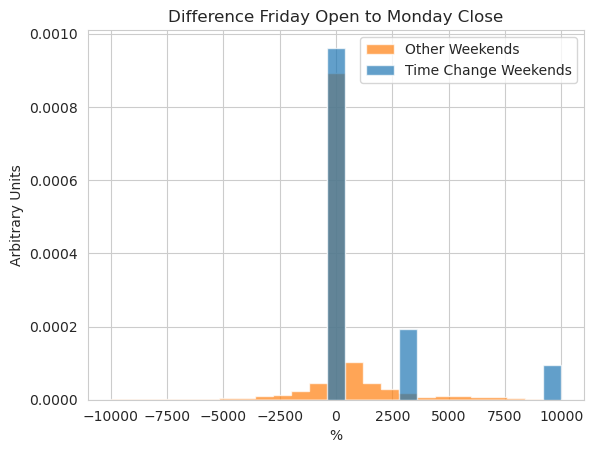

In [163]:
plot_overlaid_fractional_difference(Stocks_dst_fri['Open'], Stocks_dst_mon['Close'], Stocks_fri['Open'], Stocks_mon['Close'], 'Time Change Weekends', 'Other Weekends', 'Difference Friday Open to Monday Close', 25)